<a href="https://colab.research.google.com/github/ValentinBarco/Aprendisaje-de-maquina/blob/master/Ejercicio_3_AdM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Creacion del dataset y visualizacion del mismo

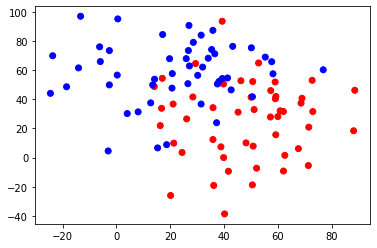

In [19]:
mediaX1 = 50
mediaY1 = 20
muestras = 50
desvioX1 = 20
desvioY1 = 25
mediaX2 = 20
mediaY2 = 60
muestras = 50
desvioX2 = 25
desvioY2 = 20

X1 = pd.Series(np.random.normal(loc= mediaX1, scale=desvioX1, size=muestras));
Y1 = pd.Series(np.random.normal(loc= mediaY1, scale=desvioY1, size=muestras));

Data1 = pd.DataFrame({'color':'r','target':'A','x':X1,'y':Y1});

X2 = pd.Series(np.random.normal(loc= mediaX2, scale=desvioX2, size=muestras));
Y2 = pd.Series(np.random.normal(loc= mediaY2, scale=desvioY2, size=muestras));

Data2 = pd.DataFrame({'color':'b','target':'B','x':X2,'y':Y2});

Dataset = pd.concat([Data1,Data2,],ignore_index= True,axis=0)

plt.scatter(Dataset['x'],Dataset['y'], c= Dataset['color'])



#Implementacion de K-Vecinos mas cercanos


In [39]:
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset[['x','y']], Dataset['target'], test_size=0.8, random_state=0)

Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=3)
Kvecinos.fit(X_train, y_train)





KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#Matriz de confusion

Text(0.5, 0.98, 'Confusion Matrix')

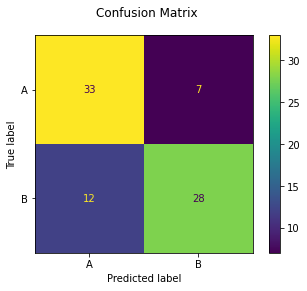

In [40]:
disp = metrics.plot_confusion_matrix(Kvecinos, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")


#Validacion cruzada

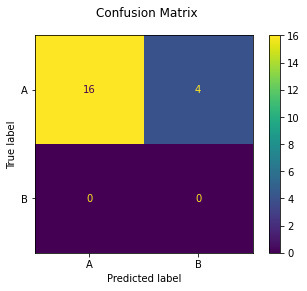

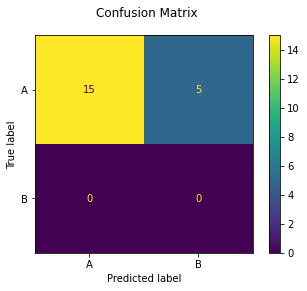

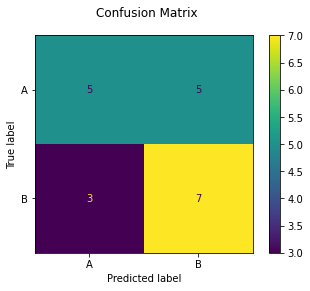

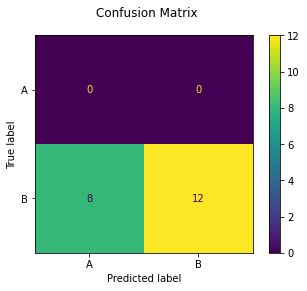

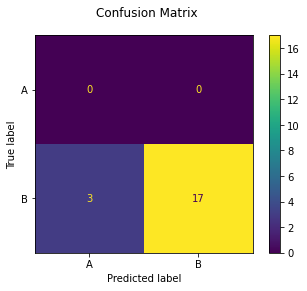

In [41]:
import numpy as np
from sklearn.model_selection import KFold
X = Dataset[['x','y']].values
y = Dataset['target']
kf = KFold(n_splits=5)
kf.get_n_splits(X)


for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  Kvecinos = neighbors.KNeighborsClassifier(n_neighbors=3)
  Kvecinos.fit(X_train, y_train)
  disp = metrics.plot_confusion_matrix(Kvecinos, X_test, y_test)
  disp.figure_.suptitle("Confusion Matrix")
  




#Intento de coloreo de zonas

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


X = Dataset[['x','y']].values
y = Dataset['target']

h = .02 

cmap_light = ListedColormap(['orange', 'cyan' ])
cmap_bold = ListedColormap(['darkorange', 'c' ])


clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()